In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [21]:
# Set Parameters
n_samples = 100000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [22]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [23]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [24]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

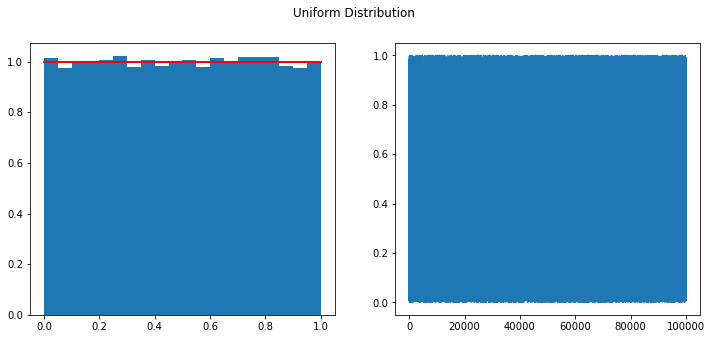

In [25]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

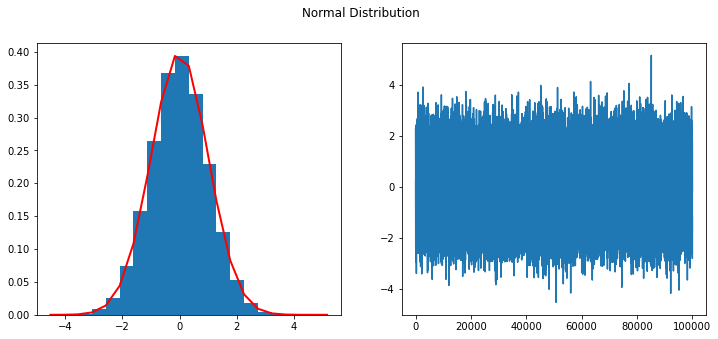

In [26]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

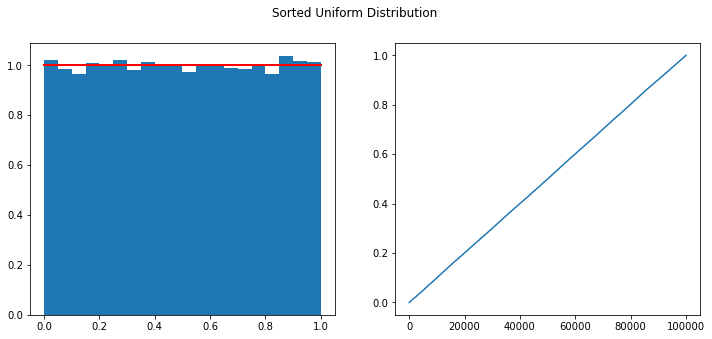

In [27]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

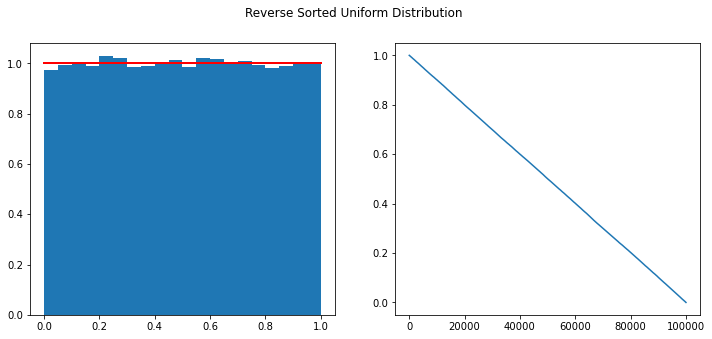

In [28]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

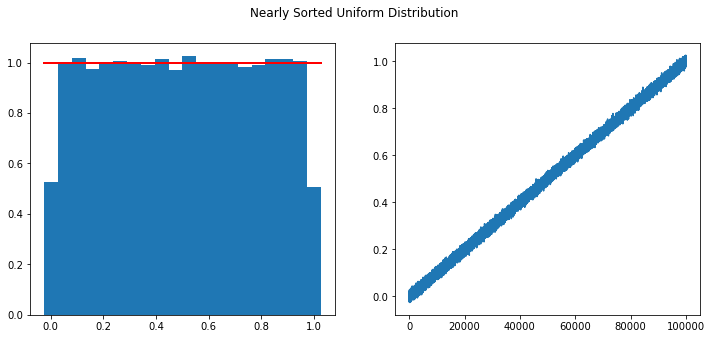

In [29]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

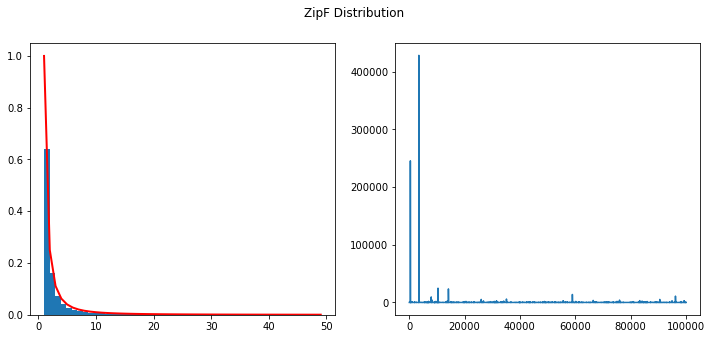

In [30]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [31]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [32]:
df_distribions = create_df_distributions()

In [33]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf,Strings,Dates,Repetetive_Numbers
0,0.850377,-0.258660,0.000028,0.999970,-0.004363,3,c09,1901-03-05 20:45:59.558019,89
1,0.084559,-0.855005,0.000033,0.999956,0.011604,3,wtx,2004-11-22 20:45:59.558019,14
2,0.457420,-3.101583,0.000034,0.999953,-0.007643,15,pab,1993-07-11 20:45:59.558019,11
3,0.090195,0.485493,0.000071,0.999948,0.000348,4,hjl,1960-03-17 20:45:59.558019,11
4,0.517564,-0.889078,0.000076,0.999947,-0.001052,1,t5q,1980-06-28 20:45:59.558019,14


In [34]:
def evaluate_sorts(distribution="Uniform", second_col = None, repetitions=100):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution, second_col],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    return measures

In [35]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 53.3704 miliseconds
It has a STD of 3.43
The time of mergesort is 54.0881 miliseconds
It has a STD of 1.97
The time of heapsort is 54.1087 miliseconds
It has a STD of 2.3


In [36]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 79.4225 miliseconds
It has a STD of 3.34
The time of mergesort is 79.3944 miliseconds
It has a STD of 3.21
The time of heapsort is 80.8472 miliseconds
It has a STD of 4.71


In [37]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 36.8474 miliseconds
It has a STD of 2.54
The time of mergesort is 36.7678 miliseconds
It has a STD of 2.53
The time of heapsort is 36.4722 miliseconds
It has a STD of 1.51


In [38]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 47.5398 miliseconds
It has a STD of 2.16
The time of mergesort is 50.4921 miliseconds
It has a STD of 5.63
The time of heapsort is 49.6131 miliseconds
It has a STD of 3.99


In [39]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 13.8784 miliseconds
It has a STD of 0.89
The time of mergesort is 13.3103 miliseconds
It has a STD of 0.88
The time of heapsort is 17.1686 miliseconds
It has a STD of 1.87


In [40]:
print("Dates")
df_dates = evaluate_sorts(distribution="Dates")

Dates
The time of quicksort is 21.7005 miliseconds
It has a STD of 1.08
The time of mergesort is 22.0756 miliseconds
It has a STD of 1.18
The time of heapsort is 29.5633 miliseconds
It has a STD of 1.9


In [41]:
print("Strings")
df_strings = evaluate_sorts(distribution="Strings")

Strings
The time of quicksort is 93.2635 miliseconds
It has a STD of 6.67
The time of mergesort is 85.7868 miliseconds
It has a STD of 2.95
The time of heapsort is 156.9652 miliseconds
It has a STD of 9.74


In [42]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 21.4145 miliseconds
It has a STD of 1.15
The time of mergesort is 22.2655 miliseconds
It has a STD of 1.25
The time of heapsort is 29.5232 miliseconds
It has a STD of 2.57


In [43]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 21.1226 miliseconds
It has a STD of 0.96
The time of mergesort is 22.4422 miliseconds
It has a STD of 2.12
The time of heapsort is 28.832 miliseconds
It has a STD of 1.25


In [44]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 9.7855 miliseconds
It has a STD of 0.63
The time of mergesort is 9.0353 miliseconds
It has a STD of 1.24
The time of heapsort is 15.551 miliseconds
It has a STD of 1.37


In [45]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 10.6826 miliseconds
It has a STD of 1.33
The time of mergesort is 8.9112 miliseconds
It has a STD of 0.74
The time of heapsort is 16.1976 miliseconds
It has a STD of 1.94


In [46]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 17.0819 miliseconds
It has a STD of 0.93
The time of mergesort is 17.5322 miliseconds
It has a STD of 1.01
The time of heapsort is 21.7555 miliseconds
It has a STD of 2.22


In [47]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 13.5966 miliseconds
It has a STD of 0.81
The time of mergesort is 13.0999 miliseconds
It has a STD of 0.77
The time of heapsort is 15.1829 miliseconds
It has a STD of 0.73


In [48]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Distribution')
    count, bins, ignored = ax1.hist(sort_dist, 10, density=True)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)

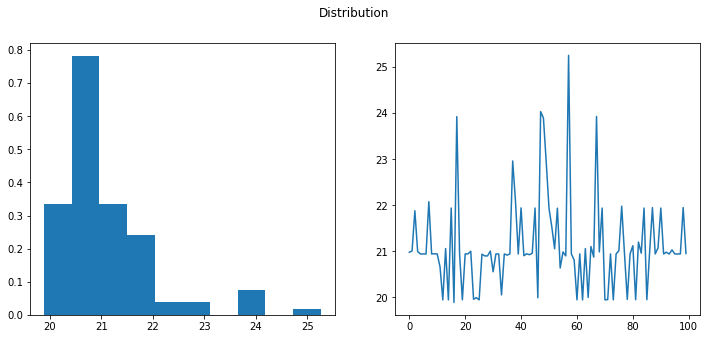

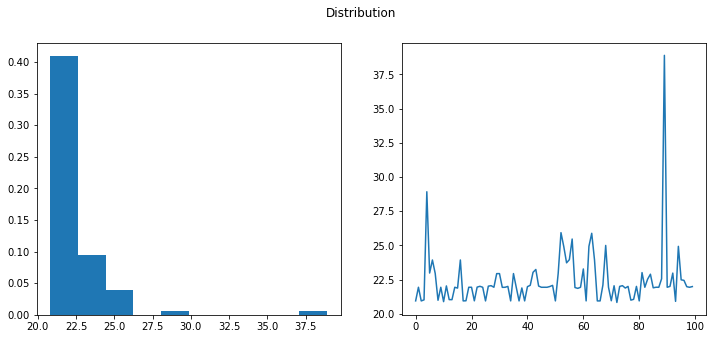

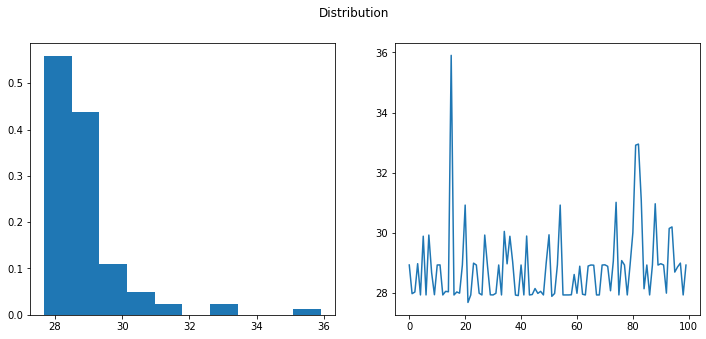

In [49]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean)

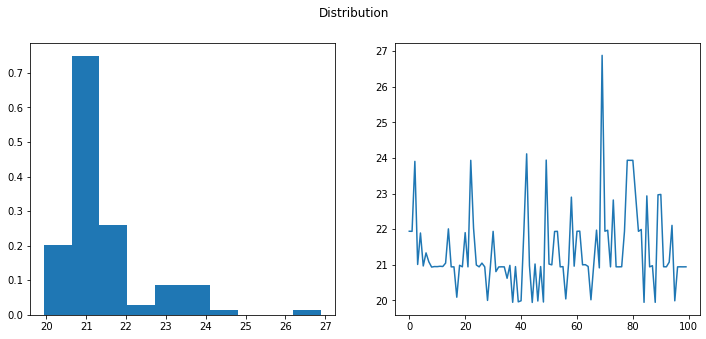

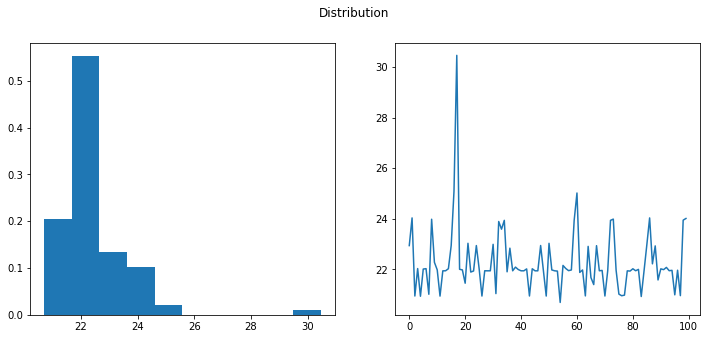

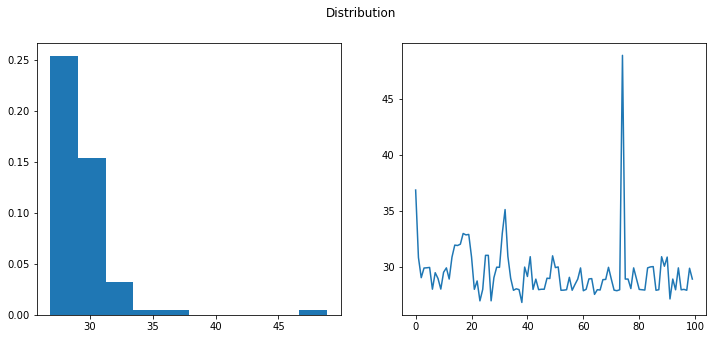

In [50]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean)

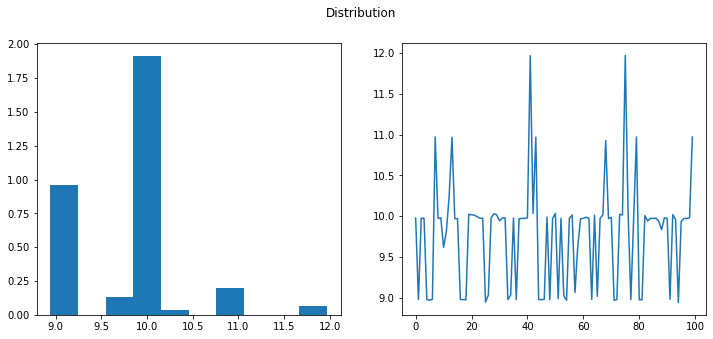

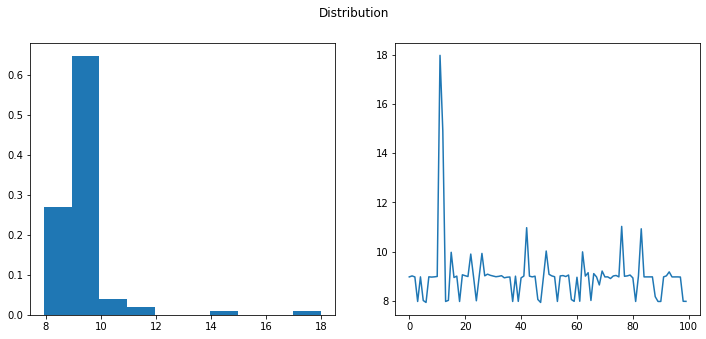

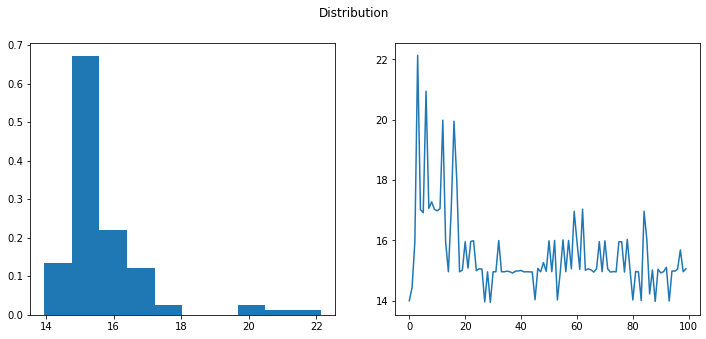

In [51]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean)

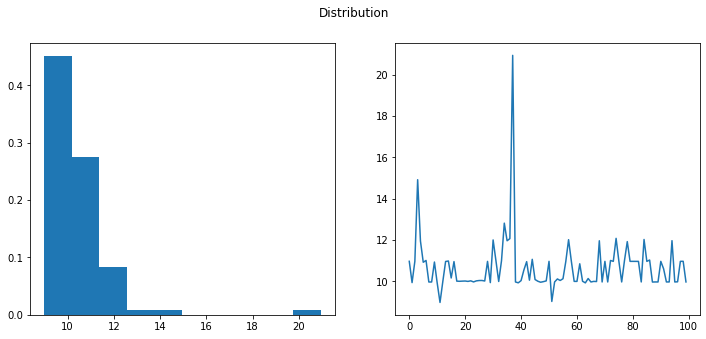

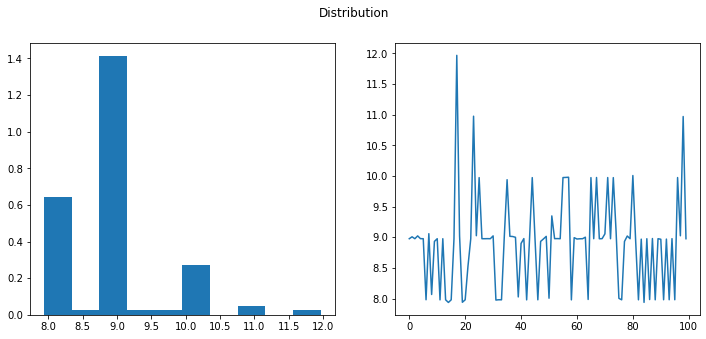

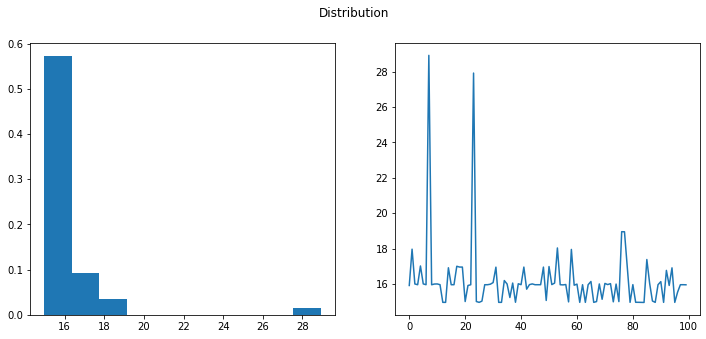

In [52]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean)

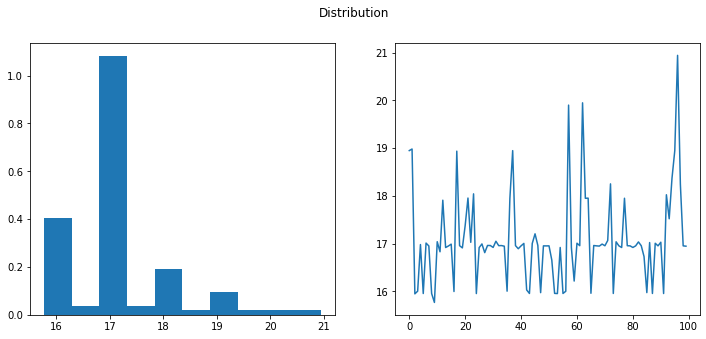

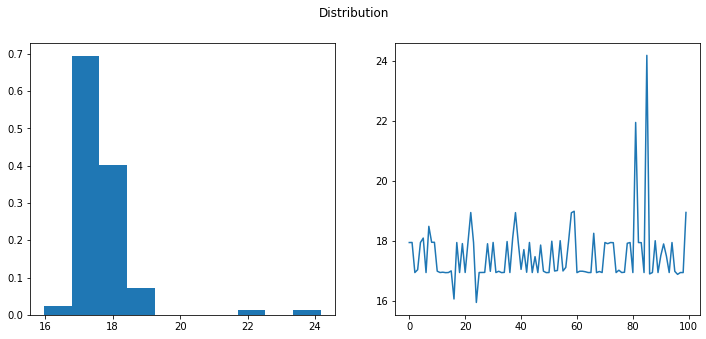

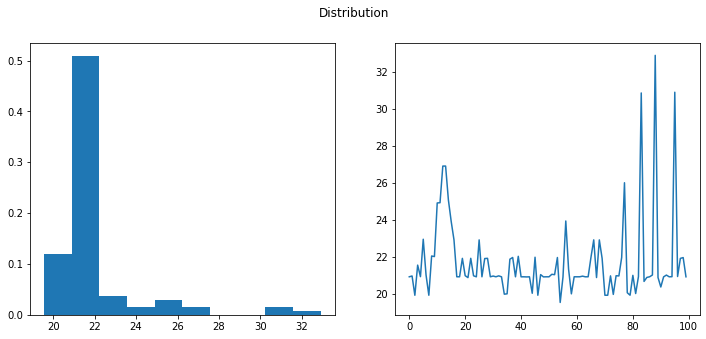

In [53]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean)

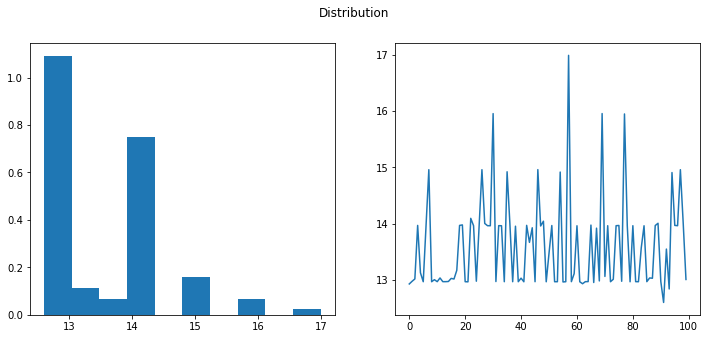

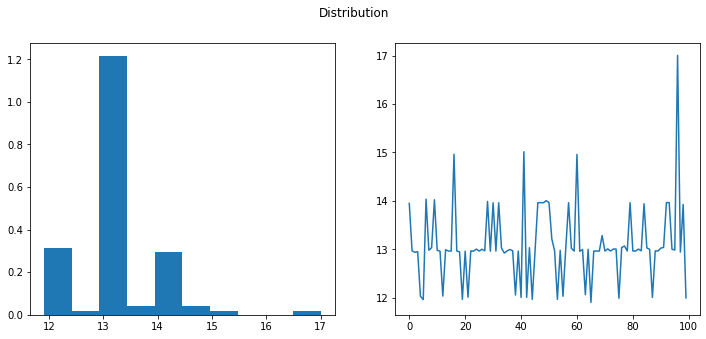

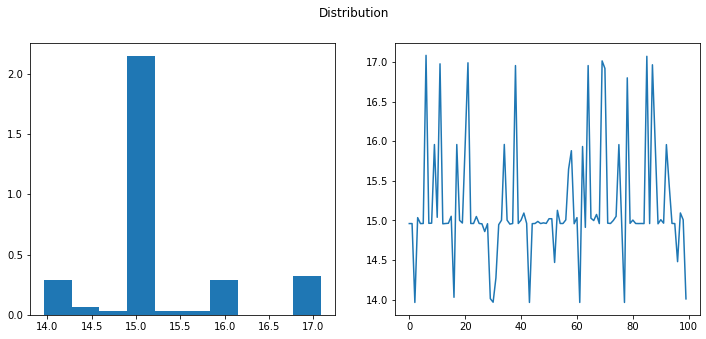

In [54]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean)